# Code to simulate and visualise 1D system of Delta Hes


$$\frac{dh}{dt} = m_h(t) - \gamma_h h(t) $$

$$\frac{dm_h}{dt} = \eta\frac{p_h^l}{p_h^l + h(t - \tau_h)^l} + \varepsilon\frac{d_{\text{adj}}(t - \tau_d)^n}{p_d^n + d_{\text{adj}}(t - \tau_d)^n} - \gamma_m m_h(t)$$

$$\frac{dd}{dt} = m_d(t) - \gamma_d d(t) $$

$$\frac{dm_d}{dt} = \frac{p_h^l}{p_h^l + h(t - \tau_h)^l} - \gamma_m m_d(t)$$




In [1]:
# import necessary packages
import numpy as np
import matplotlib.pyplot as plt
from types import SimpleNamespace
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
from tqdm import tqdm
import visualisation as vis
from delta_hes_model import *
from scipy.signal import find_peaks

plt.rcParams['text.usetex'] = True

## Parameters

In [8]:
#set the lattice of the cells 
P = 40
Q = 1

lattice = get_lattice(P, Q)

# #set first cell to have no coupling with the rest of the cells
# lattice.connectivity[:,0] = np.zeros(P*Q)

# # set initial parameters of the reactions 
gamma_h = 0.03
gamma_d = 0.03
gamma_m = 0.03
p_h = 100
p_d = 50
T_h = 20
T_coupling = 0
w_h = 1
w_coupling = 0.5
l = 5
n = 3

params = get_params(gamma_h, gamma_d, gamma_m, p_h, p_d, T_h, T_coupling, w_h, w_coupling, l, n, lattice, grad_hes = False, grad_coup = False, grad_hes_strength = 1.2, grad_coup_strength = 0)
print(params)

namespace(gamma_h=0.03, gamma_d=0.03, gamma_m=0.03, p_h=100, p_d=50, T_h=array([20., 20., 20., 20., 20., 20., 20., 20., 20., 20., 20., 20., 20.,
       20., 20., 20., 20., 20., 20., 20., 20., 20., 20., 20., 20., 20.,
       20., 20., 20., 20., 20., 20., 20., 20., 20., 20., 20., 20., 20.,
       20.]), T_coupling=array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0.]), w_h=1, w_coupling=0.5, l=5, n=3, grad_hes=False, grad_coup=False, grad_hes_strength=1.2, grad_coup_strength=0)


## Run simulation

In [21]:
num_tsteps = 40000
dt = 0.2
h, m_h, d, m_d = simulate(num_tsteps, dt, lattice, params, coupling_type= 'Delta', initial_type='uniform')

100%|██████████| 39999/39999 [08:47<00:00, 75.82it/s] 



## Plot

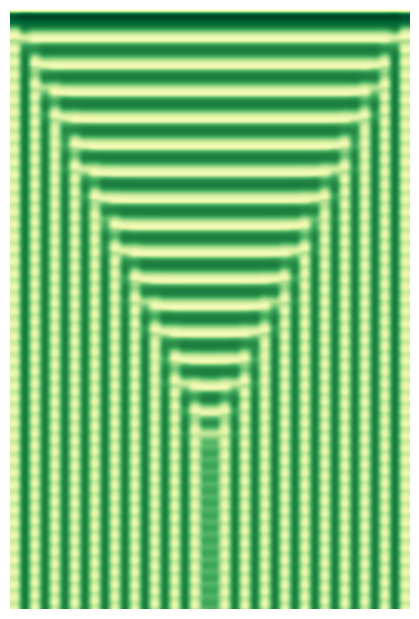

In [30]:
data = h.reshape(num_tsteps, lattice.P)
data = data[:30000, :]

# Assuming `data` is already reshaped as (num_tsteps, lattice.P)
fig, ax = plt.subplots(figsize=(4, 6))  # 2:3 ratio (width:height = 3:2)

im = ax.imshow(
    data,
    aspect='auto',
    # cmap='YlOrRd',
    cmap = 'YlGn',
    vmin=np.min(data),
    vmax=np.max(data),
    extent=[0, lattice.P, 0, num_tsteps * dt]
)

# Remove axes and ticks
ax.axis('off')

# Eliminate all padding and whitespace
plt.subplots_adjust(left=0, right=1, top=1, bottom=0)
plt.margins(0,0)
# plt.savefig("cover_2.png", bbox_inches='tight', pad_inches=0, dpi=600)

# Show plot
plt.show()


In [ ]:
plt.figure()
plt.plot(h[:,1,0], label = 'h')
plt.plot(h[:,0,0], label = 'h cell 2')
# plt.plot(m_h[:,10,0], label = 'm_h')
# plt.plot(d[:,10,0], label = 'd')
# plt.plot(m_d[:,10,0], label = 'm_d')
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.legend()
plt.show()

NameError: name 'plt' is not defined

## Animate

KeyboardInterrupt: 

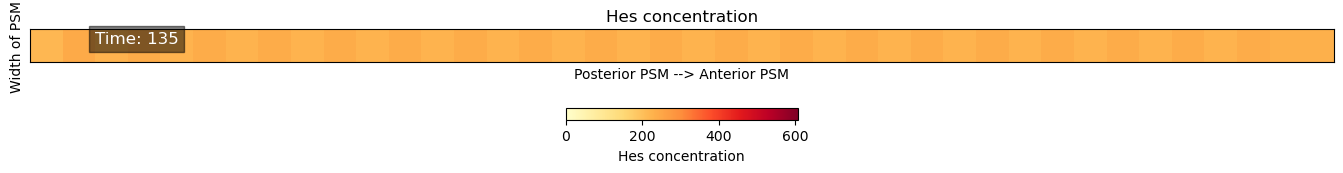

In [139]:
vis.animate_2D(h[::5,:,:], interval=5, plot_save=False, filename='1D_unstable_travelling_wave.gif', title = 'Hes concentration')